## SMOTE

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12, n_redundant=0)

In [5]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [7]:
from matplotlib import pyplot as plt

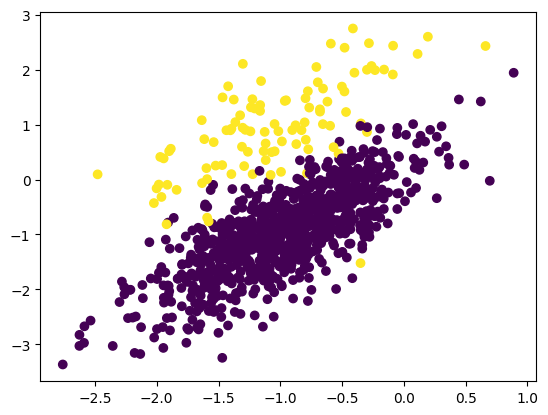

In [8]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [15]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 939.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
oversample = SMOTE()

In [21]:
X,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [22]:
X.shape

(1800, 2)

In [28]:
y.shape

(1800,)

In [29]:
len(y[y==0])

900

In [30]:
len(y[y==1])

900

In [32]:
df1=pd.DataFrame(X, columns=['f1', 'f2'])
df2=pd.DataFrame(y, columns=['target'])
oversample_df=pd.concat([df1, df2], axis=1)

In [33]:
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


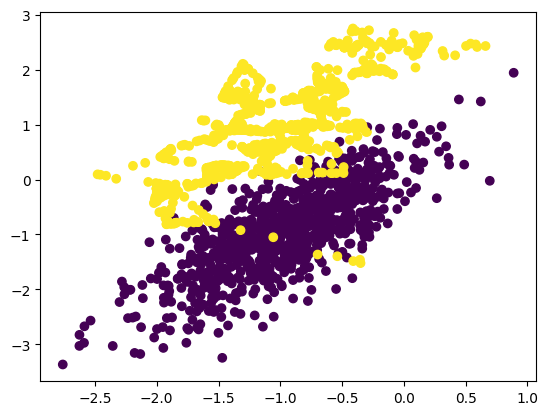

In [34]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

In [14]:
# Load dataset
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [45]:
df.shape

(284807, 31)

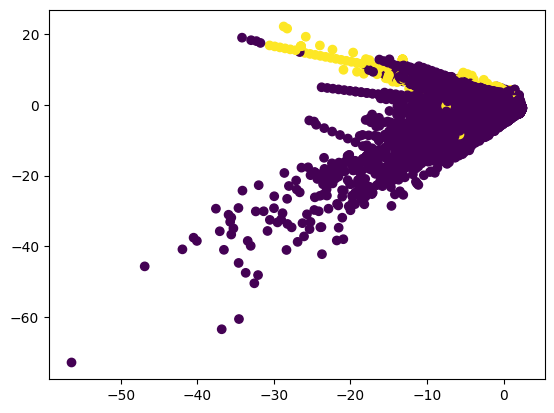

In [44]:
plt.scatter(df['V1'], df['V2'], c=df['Class'])

In [49]:
# Manual oversampling
from sklearn.utils import resample

df_minority = df[df['Class']==1]
df_majority = df[df['Class']==0]

In [53]:
len(df_majority)

284315

In [55]:
df_majority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
df_upsample_minority = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [57]:
df_upsample_minority.shape

(284315, 31)

In [59]:
df_balance_upsample = pd.concat([df_majority, df_upsample_minority]).reset_index(drop=True)

In [60]:
df_balance_upsample.shape

(568630, 31)

In [61]:
df_balance_upsample['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

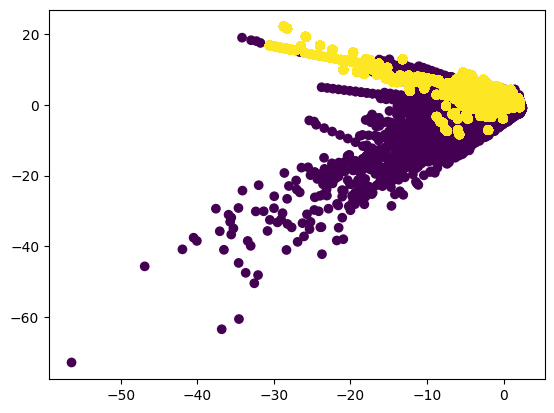

In [62]:
plt.scatter(df_balance_upsample['V1'], df_balance_upsample['V2'], c=df_balance_upsample['Class'])

In [63]:
# Manual undersampling

df_undersample_majority = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [64]:
df_undersample_majority.shape

(492, 31)

In [65]:
len(df_minority)

492

In [66]:
df_balance_undersample = pd.concat([df_undersample_majority, df_minority]).reset_index(drop=True)

In [68]:
df_balance_undersample.shape

(984, 31)

In [69]:
df_balance_undersample['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

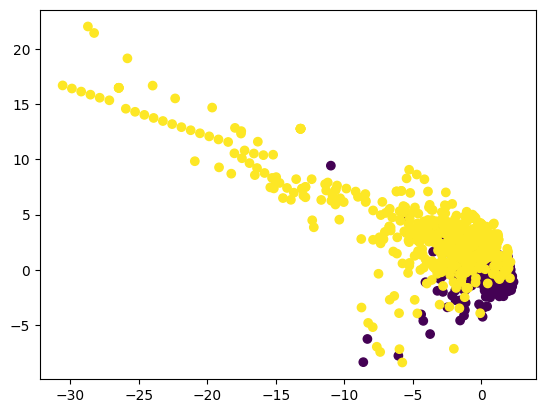

In [70]:
plt.scatter(df_balance_undersample['V1'], df_balance_undersample['V2'], c= df_balance_undersample['Class'])

In [71]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

In [72]:
oversample = SMOTE()

In [90]:
X,y = oversample.fit_resample(df[df.columns.drop('Class')], df['Class'])

In [93]:
X.shape

(568630, 30)

In [94]:
y.shape

(568630,)

In [95]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [100]:
df_smote_balance = pd.concat([X,y], axis=1)

In [101]:
df_smote_balance.shape

(568630, 31)

In [102]:
df.shape

(284807, 31)

In [104]:
df_smote_balance.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
df_smote_balance['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

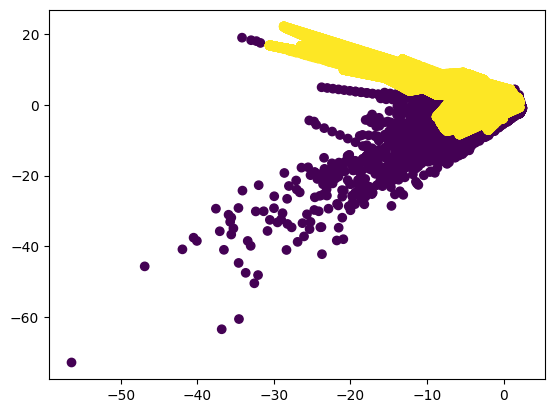

In [106]:
plt.scatter(df_smote_balance['V1'], df_smote_balance['V2'], c=df_smote_balance['Class'])

In [48]:
# Load Multiclass Imbalance Dataset

df = pd.read_csv('dataset/gender.csv')

In [34]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


In [35]:
df=df[df.columns.drop('Unnamed: 9')]

In [36]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [50]:
df.columns = df.columns.str.strip()

In [38]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [51]:
df['Gender'].value_counts()

male       41
female     39
 male      27
 female    24
Name: Gender, dtype: int64

In [40]:
df.shape

(131, 9)

In [44]:
df['Gender'].value_counts()

male       41
female     39
 male      27
 female    24
Name: Gender, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
oversample = SMOTE()

In [45]:
X,y = oversample.fit_resample(df['Age'], df['Gender'])

ValueError: Expected 2D array, got 1D array instead:
array=[32 25 41 38 29 45 27 52 31 36 24 44 28 29 33 37 26 28 33 44 29 31 40 27
 47 35 42 26 49 30 35 38 31 29 32 27 41 36 29 33 45 28 39 32 44 26 36 29
 42 30 34 35 28 42 31 30 36 44 29 37 26 43 34 36 27 41 30 38 29 40 33 39
 32 45 28 34 31 42 30 37 37 27 44 32 39 29 43 31 38 28 41 33 36 30 42 34
 35 29 40 31 43 32 37 28 34 32 27 44 35 38 30 42 29 36 31 41 33 35 28 40
 34 37 29 40 31 43 32 38 27 33 29].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.